Analyzing treesequence output from SLiM


In [34]:
import msprime, tskit, pyslim, time 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [35]:
ts = tskit.load("../results/out.trees").simplify()

In [5]:
for tree in ts.trees():
    print(f"Tree {tree.index} covers {tree.interval}")
    if tree.index >= 4:
        print("...")
        break
print(f"Tree {ts.last().index} covers {ts.last().interval}")

Tree 0 covers Interval(left=0.0, right=10000.0)
Tree 1 covers Interval(left=10000.0, right=10001.0)
Tree 2 covers Interval(left=10001.0, right=20002.0)
Tree 3 covers Interval(left=20002.0, right=20003.0)
Tree 4 covers Interval(left=20003.0, right=20004.0)
...
Tree 258 covers Interval(left=28057.0, right=30008.0)


In [6]:
import time
elapsed = time.time()
for tree in ts.trees():
    if tree.has_multiple_roots:
        print(f"Tree {tree.index} has not coalesced")
        break
else:
    elapsed = time.time() - elapsed
    print(f"All {ts.num_trees} trees coalesced")
    print(f"Checked in {elapsed:.6g} secs")

Tree 258 has not coalesced


Tree number 1, which runs from position 10000.0 to 10001.0:


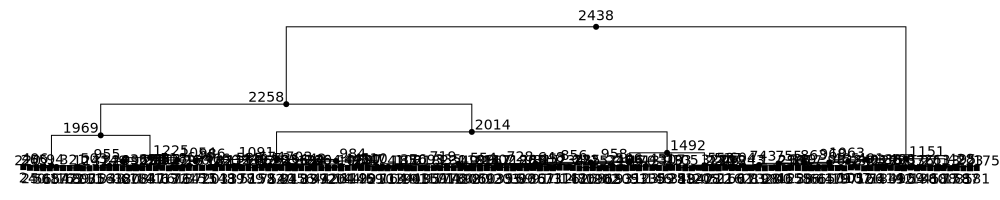

In [7]:
swept_tree = ts.at(10_000)  # or you can get e.g. the nth tree using ts.at_index(n)
intvl = swept_tree.interval
print(f"Tree number {swept_tree.index}, which runs from position {intvl.left} to {intvl.right}:")
# Draw it at a wide size, to make room for all 40 tips
swept_tree.draw_svg(size=(1000, 200))

In [44]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

Contents in csv file:      cycle  sex_ratio
0        1   0.500000
1       11   0.485981
2       21   0.455446
3       31   0.540000
4       41   0.560000
..     ...        ...
995   9951   0.510000
996   9961   0.504950
997   9971   0.531250
998   9981   0.472222
999   9991   0.474227

[1000 rows x 2 columns]


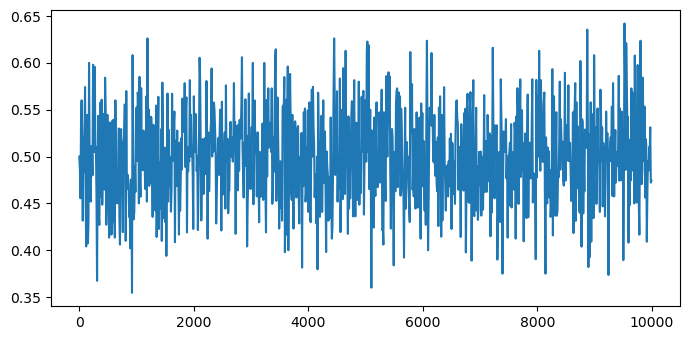

In [45]:
columns = ["cycle", "sex_ratio"]
df = pd.read_csv("../results/sim_log.txt", usecols=columns)
print("Contents in csv file:", df)
plt.plot(df.cycle, df.sex_ratio)

In [12]:
plt.show()

In [57]:
#TODO
#TMRCA
#Balance
#Pi 

In [11]:
ts = msprime.sim_ancestry(2)

In [16]:
tree = ts.first()
tree

In [56]:
tree.tmrca(0, 20)

0.017194636754334112

In [55]:
num_replicates = 100
tmrca = np.zeros(num_replicates)
sample_replicates = msprime.sim_ancestry(10, num_replicates=num_replicates, random_seed=42)

def tmrca_array(replicates):
    for replicate_index, ts in enumerate(replicates):
        tree = ts.first()
        tmrca[replicate_index] = tree.time(tree.root)
    return tmrca

tmrca = tmrca_array(sample_replicates)
np.mean(tmrca), np.var(tmrca)

(3.799291711240622, 3.920289255957004)

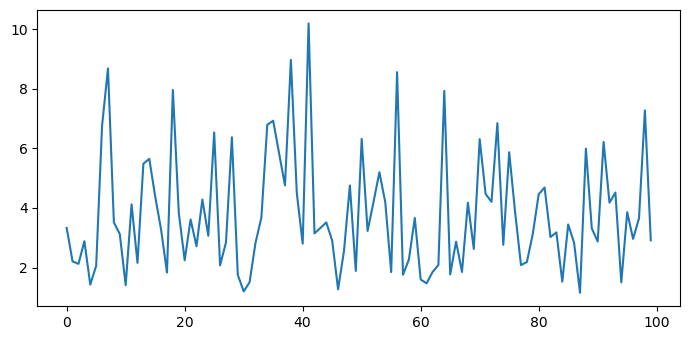

In [52]:
plt.plot(tmrca)

In [58]:
ts = tskit.load("../results/out.trees").simplify()

In [59]:
tmrca_array(ts.num_re)

TypeError: 'TreeSequence' object is not iterable